In [1]:
# loading dependencies
import numpy  as np
import pandas as pd

In [2]:
alls = pd.read_excel('example.xlsx')
alls

,location name,type,price,area
0,Golden Mile,houses,4400000,918.0
1,Golden Mile,houses,2400000,NaN
2,Nagüeles,houses,1900000,393.0
3,NaN,NaN,4250000,640.0
4,Golden Mile,houses,32000000,11000.0
5,Nagüeles,plots,2900000,5528.0
6,Golden Mile,apartments,3900000,530.0
7,Golden Mile,houses,3148000,600.0
8,Golden Mile,houses,2950000,1000.0
9,Nagüeles,houses,2400000,1391.0


In [3]:
alls.groupby(['type','location name'])['price'].describe()

count          mean           std       min  \
type       location name                                                     
apartments Alenquer            101.0  9.038861e+04  5.437486e+04   50000.0   
           Golden Mile         337.0  7.336994e+05  7.039026e+05       0.0   
           Nagüeles            927.0  4.263147e+05  2.992887e+05       0.0   
           Quinta da Marinha    53.0  1.186285e+06  8.446338e+05       0.0   
houses     Alenquer            575.0  2.878391e+05  4.655339e+05       0.0   
           Golden Mile         332.0  1.757169e+06  2.562273e+06       0.0   
           Nagüeles           1209.0  1.254269e+06  1.604773e+06       0.0   
           Quinta da Marinha  1096.0  2.601735e+06  2.741871e+06       0.0   
plots      Golden Mile           9.0  1.901667e+06  1.518811e+06  350000.0   
           Nagüeles             56.0  2.784734e+06  1.860545e+06  370000.0   

                                    25%        50%        75%         max  
type       location name                                                   
apartments Alenquer             61500.0    73500.0    93600.0    408000.0  
           Golden Mile         310000.0   595000.0   900000.0   4950000.0  
           Nagüeles            265000.0   347300.0   475000.0   2169448.0  
           Quinta da Marinha   995000.0  1245000.0  1481664.0   3500000.0  
houses     Alenquer             79000.0   163000.0   260000.0   3900000.0  
           Golden Mile         450000.0  1282500.0  2461000.0  32000000.0  
           Nagüeles            460000.0   750000.0  1495000.0  32000000.0  
           Quinta da Marinha  1000000.0  1980000.0  3085000.0  33601345.0  
plots      Golden Mile         550000.0  1370000.0  3640000.0   3640000.0  
           Nagüeles           1316250.0  3000000.0  4200000.0   5500000.0

In [4]:
# selected data if we got location name, type, any area size information and price
baseline =  alls[(alls['price'] > 0) & (alls['area'] > 0)].dropna()

# calculate price per square meter
baseline['price/m'] = baseline['price']/baseline['area']

# create empty series to later attribute a value
baseline['Z-Score'] = 0
baseline['over-valued'] = 0
baseline['under-valued'] = 0
baseline['normal'] = 0

baseline

,location name,type,price,area,price/m,Z-Score,over-valued,under-valued,normal
0,Golden Mile,houses,4400000,918.0,4793.028322,0,0,0,0
2,Nagüeles,houses,1900000,393.0,4834.605598,0,0,0,0
4,Golden Mile,houses,32000000,11000.0,2909.090909,0,0,0,0
5,Nagüeles,plots,2900000,5528.0,524.602026,0,0,0,0
6,Golden Mile,apartments,3900000,530.0,7358.490566,0,0,0,0
7,Golden Mile,houses,3148000,600.0,5246.666667,0,0,0,0
8,Golden Mile,houses,2950000,1000.0,2950.000000,0,0,0,0
9,Nagüeles,houses,2400000,1391.0,1725.377426,0,0,0,0
10,Nagüeles,apartments,2169448,2014.0,1077.183714,0,0,0,0
11,Golden Mile,houses,1950000,603.0,3233.830846,0,0,0,0


In [5]:
# batch calculation of the Z-Score
for name, group in baseline.groupby(['type','location name']):
    baseline.loc[(baseline['location name'] == name[1]) &
                 (baseline['type'] == name[0]), 'Z-Score'] = (group['price/m']-group['price/m'].mean())/group['price/m'].std()

# if its 1 standard deviation above the mean price per square meter, classifity it as over-valued
baseline.loc[baseline['Z-Score'] > 1, 'over-valued'] = 1
# if its 1 standard deviation under, classifity it as under-valued, otherwise its normal
baseline.loc[baseline['Z-Score'] < -1, 'under-valued'] = 1
baseline.loc[(baseline['Z-Score'] >= -1) & (baseline['Z-Score'] <= 1), 'normal'] = 1

#checking descriptive statistics of price per square meter for each type and location
baseline.groupby(['type','location name'])['price/m'].describe()

count         mean          std          min  \
type       location name                                                      
apartments Alenquer             98.0   787.553801   216.156279    34.000000   
           Golden Mile         286.0  4958.458126  2850.936168    52.756885   
           Nagüeles            886.0  3069.414867  1298.954774  1077.183714   
           Quinta da Marinha    31.0  5408.827233  1938.755230   713.367357   
houses     Alenquer            535.0   622.063499   651.682544     0.035000   
           Golden Mile         288.0  1922.795973  1307.308371   166.616177   
           Nagüeles           1173.0  1859.555782  1037.126376   161.356209   
           Quinta da Marinha   843.0  4823.417748  2995.313510   133.555927   
plots      Golden Mile           9.0   652.683400   279.369706   300.429185   
           Nagüeles             44.0  1252.824931  1980.326081   292.156863   

                                      25%          50%          75%  \
type       location name                                              
apartments Alenquer            665.845370   791.833125   887.274485   
           Golden Mile        3084.008097  4274.758983  6014.492754   
           Nagüeles           2294.117647  2913.043478  3461.538462   
           Quinta da Marinha  4911.827370  6191.709845  6545.758929   
houses     Alenquer            132.932692   539.156627   915.266393   
           Golden Mile        1066.151030  1551.573677  2261.151892   
           Nagüeles           1282.894737  1666.666667  2103.960396   
           Quinta da Marinha  2200.000000  5252.747253  6484.375000   
plots      Golden Mile         468.085106   524.602026  1000.000000   
           Nagüeles            354.838710   512.462006   832.512315   

                                       max  
type       location name                    
apartments Alenquer            1656.626506  
           Golden Mile        16592.920354  
           Nagüeles           17692.307692  
           Quinta da Marinha   8084.415584  
houses     Alenquer            8405.172414  
           Golden Mile         8568.548387  
           Nagüeles            9586.631486  
           Quinta da Marinha  31666.666667  
plots      Golden Mile         1000.000000  
           Nagüeles            6953.223767

In [6]:
# select the locaiton and type
dfp = baseline[(baseline['location name'] == 'Nagüeles') & (baseline['type'] == 'houses')]
dfp

,location name,type,price,area,price/m,Z-Score,over-valued,under-valued,normal
2,Nagüeles,houses,1900000,393.0,4834.605598,2.868551,1,0,0
9,Nagüeles,houses,2400000,1391.0,1725.377426,-0.129375,0,0,1
17,Nagüeles,houses,765000,440.0,1738.636364,-0.116591,0,0,1
18,Nagüeles,houses,585000,524.0,1116.412214,-0.716541,0,0,1
19,Nagüeles,houses,550000,304.0,1809.210526,-0.048543,0,0,1
20,Nagüeles,houses,460000,210.0,2190.476190,0.319074,0,0,1
23,Nagüeles,houses,350000,174.0,2011.494253,0.146499,0,0,1
24,Nagüeles,houses,288750,192.0,1503.906250,-0.342918,0,0,1
71,Nagüeles,houses,495000,368.0,1345.108696,-0.496031,0,0,1
72,Nagüeles,houses,1350000,1000.0,1350.000000,-0.491315,0,0,1


#### We won't be covering Matplotlib package but if your curious, here's the code

In [7]:
import matplotlib.pyplot as plt

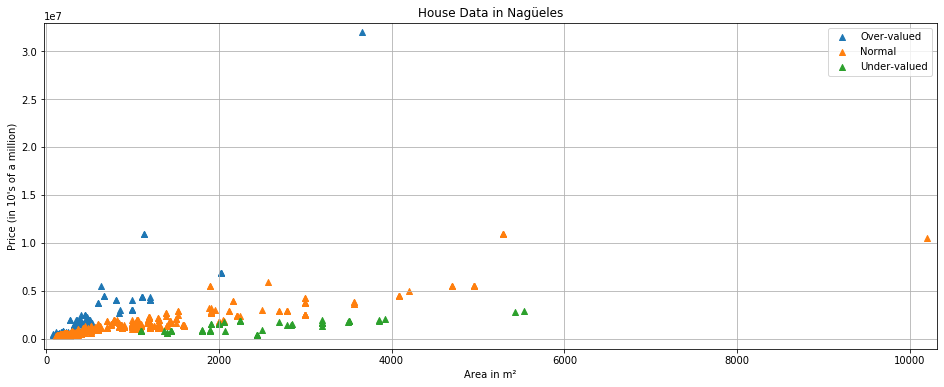

In [8]:
# Set the size of the graph, this can be done in multiple ways (e.g. in pixels)
plt.figure(figsize=(16,6))
# The line below generates the blue triangles ('Over-valued')
plt.scatter(dfp['area'][dfp['over-valued'] == 1], dfp['price'][dfp['over-valued'] == 1], marker='^', label='Over-valued')
# The line below generates the orange triangles ('Normal')
plt.scatter(dfp['area'][dfp['normal'] == 1], dfp['price'][dfp['normal'] == 1], marker='^', label ='Normal')
# The line below generates the green triangles ('Under-valued')
plt.scatter(dfp['area'][dfp['under-valued'] == 1], dfp['price'][dfp['under-valued'] == 1], marker='^', label='Under-valued')
# The line below sets the size of the margins for both axis
plt.margins(x=0.01,y=0.03)
# And the name of the labels
plt.xlabel('Area in m²')
plt.ylabel("Price (in 10's of a million)")
plt.title('House Data in Nagüeles')
plt.legend()
# Set a grid in front of the graph
plt.grid()
# And finally plot it
plt.show()